# Cat vs Dog Image Classification Using Support Vector Machine (SVM)

Inorder to classify the images as Cats and Dogs, first we will have go through preprocessing the dataset, feature extraction using HOG (Histogram of Oriented Gradients), and then training the SVM.

## Import Required Libraries

In [1]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

## Load and Preprocess the Data

In [2]:
# Define paths
train_data_dir = '../data_dir/train'
test1_data_dir = '../data_dir/test1'

# Load images and labels for the training data
def load_images(data_dir, labeled=True):
    images = []
    labels = []
    for filename in tqdm(os.listdir(data_dir)):
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Convert to grayscale
        img = cv2.resize(img, (64, 64)) #resize the images to 64x64

        if labeled:  # In the train dataset, labels are present in filenames
            label = 1 if 'dog' in filename else 0  # 1 for dog, 0 for cat
            labels.append(label)
        images.append(img)
    
    if labeled:
        return np.array(images), np.array(labels)
    else:
        return np.array(images)

# Extract HOG features from images
def extract_hog_features(images):
    hog_features = []
    for image in images:
        feature, _ = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(feature)
    return np.array(hog_features)

# Load and preprocess training data
train_images, train_labels = load_images(train_data_dir, labeled=True)
train_hog_features = extract_hog_features(train_images)

# Load and preprocess test data (test data in this case might not have labels)
test_images = load_images(test1_data_dir, labeled=False)
test_hog_features = extract_hog_features(test_images)

100%|██████████| 12500/12500 [00:41<00:00, 303.54it/s]


## Train the SVM Model Using the Training Data

In [3]:
# Use the preprocessed training data to train the SVM model.

# Inintializing the SVM model
svm = SVC(kernel='linear')

# train the SVM model
svm.fit(train_hog_features, train_labels)


SVC(kernel='linear')

## Predict Using the Test Data

In [4]:
## Predict on the test set
test_predictions = svm.predict(test_hog_features)

for i in range(10):
    print(f"image {i+1} is preicted as: {'Dog' if test_predictions[i] == 1 else 'Cat' }")


image 1 is preicted as: Dog
image 2 is preicted as: Dog
image 3 is preicted as: Cat
image 4 is preicted as: Cat
image 5 is preicted as: Dog
image 6 is preicted as: Cat
image 7 is preicted as: Cat
image 8 is preicted as: Dog
image 9 is preicted as: Cat
image 10 is preicted as: Cat


## Visualize Some Sample Predictions

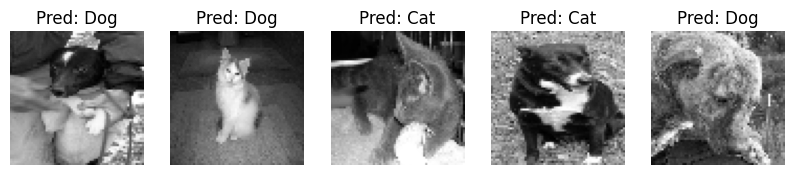

In [5]:
def show_sample_predictions(images, predictions, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Pred: {'Dog' if predictions[i] == 1 else 'Cat'}")
        plt.axis('off')
    plt.show()

# Show sample predictions from the test set
show_sample_predictions(test_images[:5].reshape(-1, 64, 64), test_predictions[:5])


## Explanation:

1. Preprocessing:
    - Images are resized to 64x64 to ensure consistency and reduce computational load.
    - Grayscale conversion is used to simplify the data.

2. Feature Extraction:
    - HOG is used to extract shape-related features from images.

3. SVM Model:
    - A linear kernel SVM is trained on the extracted features.

4. Evaluation:
    - The model is evaluated using accuracy, but you can also use metrics like precision, recall, and confusion matrix for more insights.

## Performance Tuning By Using RBF

In [6]:
# Inintializing the SVM model by uisng RBF for a better performance 
svm = SVC(kernel='rbf')

# train the SVM model
svm.fit(train_hog_features, train_labels)


SVC()

In [7]:
## Predict on the test set
test_predictions = svm.predict(test_hog_features)

for i in range(10):
    print(f"image {i+1} is preicted as: {'Dog' if test_predictions[i] == 1 else 'Cat' }")


image 1 is preicted as: Dog
image 2 is preicted as: Dog
image 3 is preicted as: Cat
image 4 is preicted as: Dog
image 5 is preicted as: Dog
image 6 is preicted as: Cat
image 7 is preicted as: Cat
image 8 is preicted as: Dog
image 9 is preicted as: Cat
image 10 is preicted as: Cat


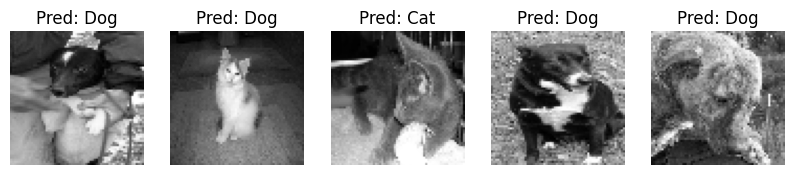

In [8]:
def show_sample_predictions(images, predictions, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Pred: {'Dog' if predictions[i] == 1 else 'Cat'}")
        plt.axis('off')
    plt.show()

# Show sample predictions from the test set
show_sample_predictions(test_images[:5].reshape(-1, 64, 64), test_predictions[:5])
